<a href="https://colab.research.google.com/github/sung429/DeepLearning/blob/master/keras_reuter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [4]:
train_data.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
import numpy as np

In [11]:
np.bincount(train_labels)

array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
        390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
         15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
         11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
         12,   18])

In [12]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [14]:
x_train.shape

(8982, 10000)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [21]:
one_hot_train_labels.shape

(8982, 46)

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
from keras import models
from keras import layers

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [27]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 6s 776us/step - loss: 2.6583 - acc: 0.5249 - val_loss: 1.7581 - val_acc: 0.6500
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.4247 - acc: 0.7056 - val_loss: 1.3003 - val_acc: 0.7170
Epoch 3/20
7982/7982 [==============================] - 1s 71us/step - loss: 1.0472 - acc: 0.7789 - val_loss: 1.1251 - val_acc: 0.7690
Epoch 4/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.8234 - acc: 0.8277 - val_loss: 1.0167 - val_acc: 0.7940
Epoch 5/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.6517 - acc: 0.8624 - val_loss: 0.9458 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.5229 - acc: 0.8896 - val_loss: 0.9013 - val_acc: 0.8100
Epoch 7/20
7982/7982 [=================

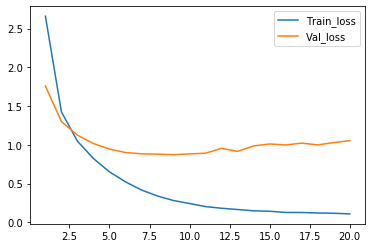

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Train_loss')
plt.plot(epochs, val_loss, label='Val_loss')
plt.legend()

plt.show()

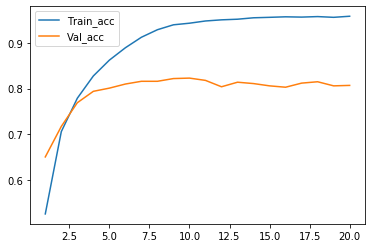

In [31]:
# import matplotlib.pyplot as plt
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, label='Train_acc')
plt.plot(epochs, val_acc, label='Val_acc')
plt.legend()

plt.show()

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 96us/step - loss: 2.7258 - acc: 0.5145 - val_loss: 1.7660 - val_acc: 0.6290
Epoch 2/9
7982/7982 [==============================] - 1s 70us/step - loss: 1.4552 - acc: 0.6967 - val_loss: 1.3239 - val_acc: 0.7050
Epoch 3/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.0809 - acc: 0.7762 - val_loss: 1.1469 - val_acc: 0.7590
Epoch 4/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.8617 - acc: 0.8147 - val_loss: 1.0574 - val_acc: 0.7700
Epoch 5/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.6928 - acc: 0.8512 - val_loss: 1.0244 - val_acc: 0.7670
Epoch 6/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.5597 - acc: 0.8815 - val_loss: 0.9590 - val_acc: 0.8040
Epoch 7/9
7982/7982 [==============================] - 1s 73us/step - loss: 0.4505 - acc: 0.9054 - val_loss: 0.9205 - val_acc: 0.8160
Epoch 8/9
7982

In [33]:
results

[0.9847084422888548, 0.790293855743544]

In [34]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1892252894033838

In [0]:
predictions = model.predict(x_test)

In [36]:
predictions[0].shape

(46,)

In [37]:
np.sum(predictions[0])

1.0000001

In [38]:
np.argmax(predictions[0])

3

In [0]:
y_train = np.array(train_labels)
